# Background and problem definition

We want to determine the best multiple variable model to best predict the 1/4 mile time using Miles per gallon(mpg), Displacement(disp), gross horsepower(hp), rear axle ratio(drat), and weight(wt). From that information, we make a final multilinear regression model.

## Setup

I will be using the mtcars dataset from Kaggle (https://www.kaggle.com/datasets/ruiromanini/mtcars?resource=download).

### Libraries

In [1]:
#These libraries were imported for the project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

### Dataset

In [2]:
#Datasets being used
data = pd.read_csv("mtcars.csv")
data = data[['mpg','disp','hp','drat','wt','qsec']]
data.head()

,mpg,disp,hp,drat,wt,qsec
0,21.0,160.0,110,3.90,2.620,16.46
1,21.0,160.0,110,3.90,2.875,17.02
2,22.8,108.0,93,3.85,2.320,18.61
3,21.4,258.0,110,3.08,3.215,19.44
4,18.7,360.0,175,3.15,3.440,17.02


## Scatterplot of QSEC VS HP

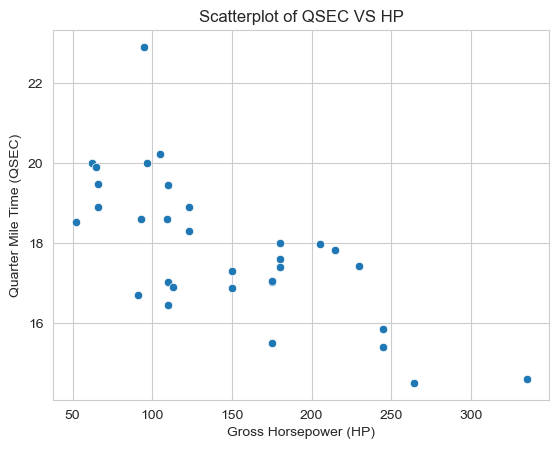

In [3]:
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="hp", y="qsec")

plt.title('Scatterplot of QSEC VS HP')
plt.xlabel('Gross Horsepower (HP)')
plt.ylabel('Quarter Mile Time (QSEC)')
plt.show()

We see a moderate linear relationship between 1/4 mile time(qsec) and gross horsepower(hp) with moderate dispersion in the lower left region.

## Scatterplot of QSEC VS WT

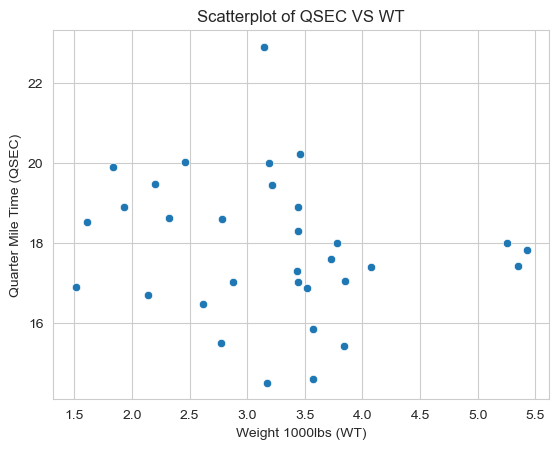

In [4]:
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="wt", y="qsec")

plt.title('Scatterplot of QSEC VS WT')
plt.xlabel('Weight 1000lbs (WT)')
plt.ylabel('Quarter Mile Time (QSEC)')
plt.show()

We don't see a clear linear relationship between 1/4 mile time(qsec) and weight(wt) with moderate dispersion on the center left region.

## Scatterplot of QSEC VS DISP

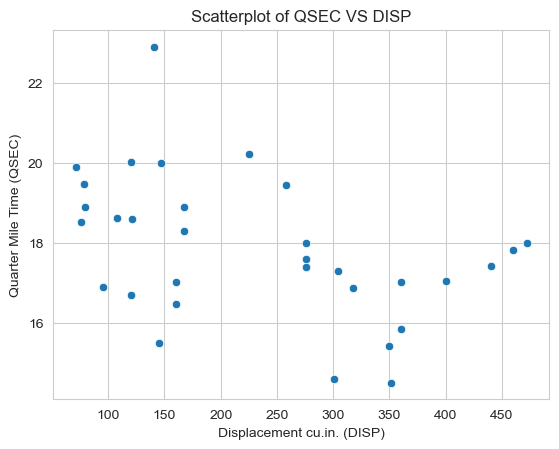

In [5]:
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="disp", y="qsec")

plt.title('Scatterplot of QSEC VS DISP')
plt.xlabel('Displacement cu.in. (DISP)')
plt.ylabel('Quarter Mile Time (QSEC)')
plt.show()

We see a moderate linera relationship between 1/4 mile time(qsec) and displacement(disp) with moderate dispersion in the left region.

## Scatterplot of QSEC VS DRAT

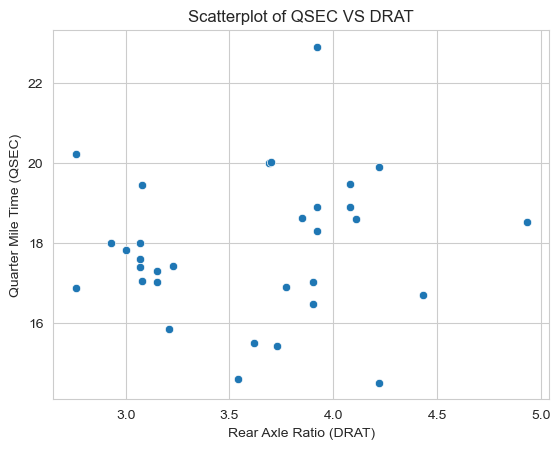

In [6]:
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="drat", y="qsec")

plt.title('Scatterplot of QSEC VS DRAT')
plt.xlabel('Rear Axle Ratio (DRAT)')
plt.ylabel('Quarter Mile Time (QSEC)')
plt.show()

We see no linear relationship between 1/4 mile time(qsec) and rear axle ratio(drat) with random dispersion

## Scatterplot of QSEC VS MPG

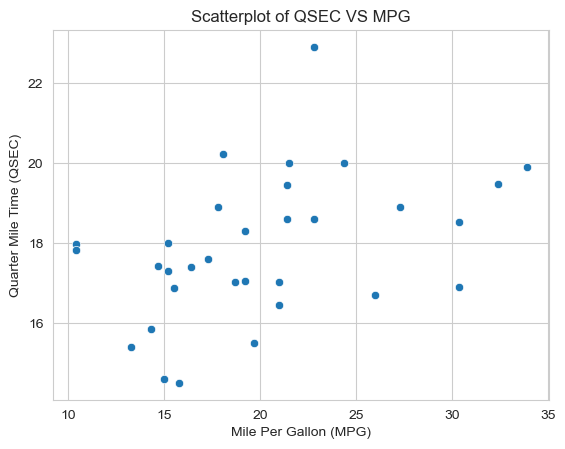

In [7]:
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="mpg", y="qsec")

plt.title('Scatterplot of QSEC VS MPG')
plt.xlabel('Mile Per Gallon (MPG)')
plt.ylabel('Quarter Mile Time (QSEC)')
plt.show()

We can see a slight linear relationship between 1/4 mile time(qsec) and miles per gallon(mpg) with moderate dispersion in the center region.

## Correlation Matrix

In [8]:
print(data.corr())

           mpg      disp        hp      drat        wt      qsec
mpg   1.000000 -0.847551 -0.776168  0.681172 -0.867659  0.418684
disp -0.847551  1.000000  0.790949 -0.710214  0.887980 -0.433698
hp   -0.776168  0.790949  1.000000 -0.448759  0.658748 -0.708223
drat  0.681172 -0.710214 -0.448759  1.000000 -0.712441  0.091205
wt   -0.867659  0.887980  0.658748 -0.712441  1.000000 -0.174716
qsec  0.418684 -0.433698 -0.708223  0.091205 -0.174716  1.000000


We can see from the correlation matrix, that hp is most significant with disp and wt as runners up.

## Stepwise Regression

In [9]:
model = smf.ols(formula='qsec ~ mpg + disp+ hp+ drat+ wt', data=data).fit()
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,16.5417,3.413,4.847,0.000,9.526,23.557
mpg,0.1086,0.078,1.394,0.175,-0.052,0.269
disp,-0.0081,0.004,-1.842,0.077,-0.017,0.001
hp,-0.0184,0.005,-3.391,0.002,-0.030,-0.007
drat,-0.5790,0.552,-1.049,0.304,-1.713,0.555
wt,1.7928,0.514,3.489,0.002,0.736,2.849


We see that drat is the least significant of 0.304, we will remove drat for the next regression

In [10]:
#removed drat
model = smf.ols(formula='qsec ~ mpg + disp+ hp + wt', data=data).fit()
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,14.6935,2.929,5.017,0.000,8.684,20.703
mpg,0.0882,0.076,1.166,0.254,-0.067,0.243
disp,-0.0065,0.004,-1.580,0.126,-0.015,0.002
hp,-0.0202,0.005,-3.928,0.001,-0.031,-0.010
wt,1.8204,0.514,3.540,0.001,0.765,2.875


We see that mpg is the least significant of 0.254, we will remove mpg for the next regression.

In [11]:
#removed mpg
model = smf.ols(formula='qsec ~ disp + hp + wt', data=data).fit()
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,17.9651,0.850,21.144,0.000,16.225,19.706
disp,-0.0066,0.004,-1.590,0.123,-0.015,0.002
hp,-0.0230,0.005,-4.986,0.000,-0.032,-0.014
wt,1.4853,0.429,3.461,0.002,0.606,2.364


We see that disp is the least significant of 0.123, we will remove disp for the next regression.

In [12]:
#removed disp
model = smf.ols(formula='qsec ~ hp + wt', data=data).fit()
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,18.8256,0.672,28.020,0.000,17.451,20.200
hp,-0.0273,0.004,-7.197,0.000,-0.035,-0.020
wt,0.9415,0.266,3.541,0.001,0.398,1.485


From the stepwise regression we are left with hp(gross horsepower) and wt(weight).

## Interaction Terms

In [13]:
y = data['qsec']
df2 = pd.DataFrame(data, columns=['hp', 'wt'])
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
df_interaction = interaction.fit_transform(df2)
df_interaction = pd.DataFrame(df_interaction, columns=interaction.get_feature_names(df2.columns))

In [14]:
def interactionReg():
    x = df_interaction[['hp','wt','hp wt']]
    x = sm.add_constant(x)
    results = sm.OLS(y, x).fit()
    print(results.summary())
interactionReg()

                            OLS Regression Results                            
Dep. Variable:                   qsec   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     17.49
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.36e-06
Time:                        17:52:35   Log-Likelihood:                -46.584
No. Observations:                  32   AIC:                             101.2
Df Residuals:                      28   BIC:                             107.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8766      1.857     10.163      0.0

Based on the interaction term results, 'hp wt' will not be used as it is above 0.05.

## Quadratic Term

In [16]:
df2 = pd.DataFrame(data, columns=['hp', 'wt'])
interaction = PolynomialFeatures(degree=2, include_bias=False)
df_interaction = interaction.fit_transform(df2)
df_interaction = pd.DataFrame(df_interaction, columns=interaction.get_feature_names(df2.columns))
#print(df_interaction)

In [17]:
def interactionReg():
    x = df_interaction[['hp','wt','hp^2', 'wt^2']]
    x = sm.add_constant(x)
    results = sm.OLS(y, x).fit()
    print(results.summary())
interactionReg()

                            OLS Regression Results                            
Dep. Variable:                   qsec   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     17.11
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           4.22e-07
Time:                        17:52:35   Log-Likelihood:                -43.271
No. Observations:                  32   AIC:                             96.54
Df Residuals:                      27   BIC:                             103.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8512      1.680     11.222      0.0

Based on our quadratic term result, wt^2 was insignificant but will keep hp^2 as it was significant.

## Multicollinearity

In [18]:
X_variables = data[['hp','wt']]
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
print(vif_data)

  feature        VIF
0      hp  10.112755
1      wt  10.112755


Based on the Variance Inflation Factor, we see that predictor variable is not too high. There is low multicollinearity.

## Final Model

Our final model is y = 18.8512 -0.0636*x1 + 2.3523*x2 + 9.358e-05*x3

## Quantile-Quantile Plot of Final Model

In [19]:
x = df_interaction[['hp','wt','hp^2']]
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()

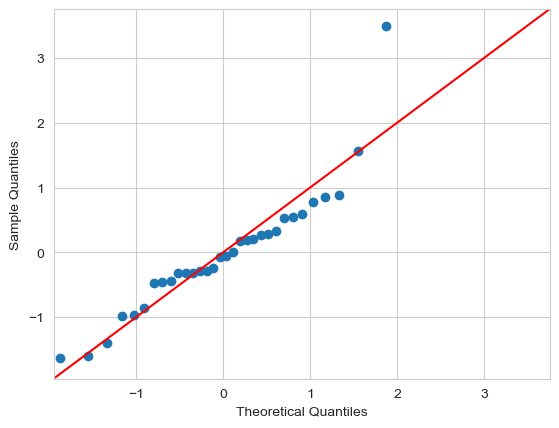

In [20]:
fig = sm.qqplot(results.resid, line='45')
plt.show()

Based on the normal qqplot, we can see that the majority of the data points fall on the line with only a couple outliers on both ends of the graph showing the model is an accurate predictor.

Cites: Romanini, R. (2017, October 19). Mtcars. Kaggle. Retrieved April 29, 2023, from https://www.kaggle.com/datasets/ruiromanini/mtcars?resource=download 